<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#군집분석-과제" data-toc-modified-id="군집분석-과제-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>군집분석 과제</a></span></li></ul></div>

# 군집분석 과제 

In [1]:
import pandas as pd

In [23]:
df = pd.read_csv("../USArrests.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [32]:
df.rename({'Unnamed: 0':'State'}, axis = 1, inplace = True)

위의 데이터에서 Murder	Assault	UrbanPop	Rape를 가지고 아래와 같이  K-means 군집분석을 진행하세요 
- 1) 최적의 k 값 찾으세요. 
- 2) 콜린스키하라바츠스코어 구하세요. 
- 3) SSE구하세요 
- 4) 군집분석한 결과를 해석하세요 

1) 최적의 k 값 찾으세요.

In [8]:
import pandas as pd
from sklearn.cluster import KMeans

X = df.copy()
X = X.drop('State', axis=1)
X.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [11]:
from sklearn.metrics import calinski_harabasz_score

for k in range(2, 10):
    kmeans_model = KMeans(n_clusters = k, random_state = 1).fit(X)
    labels = kmeans_model.labels_
    print(k, ':', calinski_harabasz_score(X, labels))

2 : 129.16750641095095
3 : 150.82736111645258
4 : 141.76241251642008
5 : 152.68636141181392
6 : 158.03230599203238
7 : 156.2208581572518
8 : 154.16122402657848
9 : 158.78597024253023


[결과해석]
- 콜린스키 지수를 보았을 때 (군집 간 분산 / 군집 내 분산)의 비율은 군집이 3개일 때 150, 4개일 때 141이다.
- 클러스터의 개수가 9개일 때 콜린스키 하라바츠 스코어(군집 간 분산 / 군집 내 분산의 비율)가 가장 높으므로 최적의 k는 9이다?

In [16]:
import matplotlib.pyplot as plt

def elbow(X):
    sse = []
    for i in range(1, 11):
        km = KMeans(n_clusters = i, random_state = 1)
        km.fit(X)
        sse.append(km.inertia_)
    
    plt.plot(range(1, 11), sse, marker = 'o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show()

C:\Users\phong\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


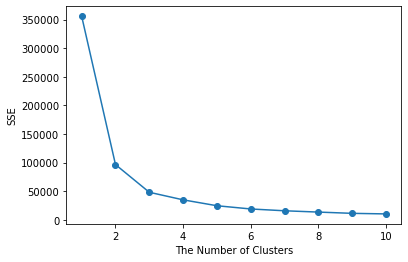

In [17]:
elbow(X)

[결과해석]
- 3과 4 사이, 4와 5사이의 기울기가 비슷하고, SSE가 급격히 줄어드므로 3이 최적의 클러스터 개수라 할 수 있다
- 그렇다면 군집의 수를 3개 또는 4개로 정하는게 바람직해보이는데, 위의 하라바츠 결과를 보면 3개(150)일때가 4개(141)일때보다 값이 크다. 
- 따라서 2가지 지표(SSE 감소효과, 콜린스키 스코어)를 고려하여 최적의 군집의 수를 3개로 설정한다.

[데싸라면님께 질문]
- 콜린스키 방법과 엘보우 방법의 k 개수가 이렇게 많이 차이나는 이유가 뭘까요?

2) 콜린스키하라바츠스코어 구하세요.

In [24]:
kmeans_model = KMeans(n_clusters = 3, random_state = 1).fit(X)
labels = kmeans_model.labels_
print(calinski_harabasz_score(X, labels))

149.86267252237516


3) SSE구하세요

In [26]:
print(kmeans_model.inertia_)

48273.1225


4) 군집분석한 결과를 해석하세요

In [27]:
new_labels = kmeans_model.labels_
X['cluster'] = new_labels

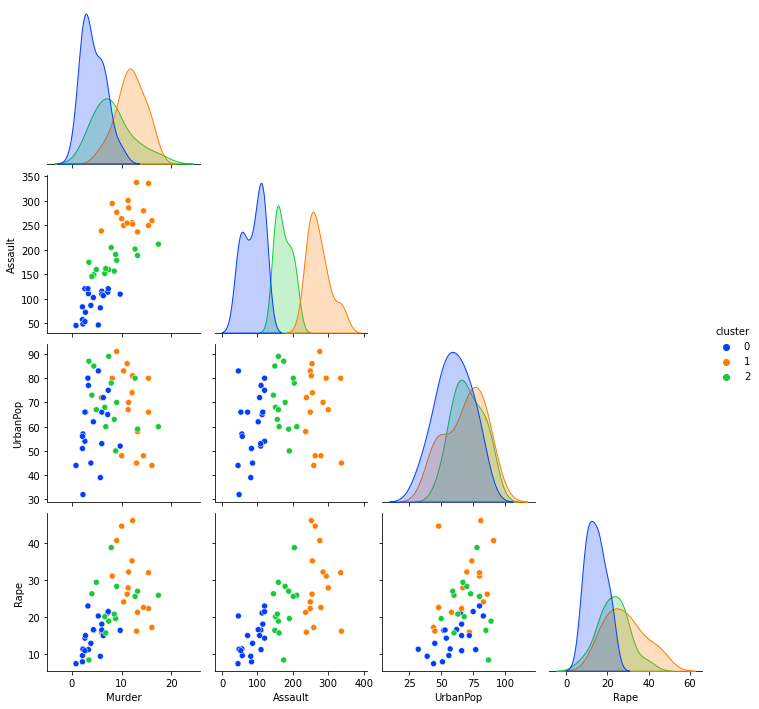

In [30]:
import seaborn as sns

sns.pairplot(X,
             diag_kind = 'kde',
             hue = 'cluster',
             corner = True,
             palette = 'bright')
plt.show()

[결과해석]
- 독립변수 Assault에 대해서는 3개의 군집으로 잘 묶고 있다
- 나머지 Murder, UrbanPop, Rape 독립변수에 대해서는 군집을 명확하게 묶어주고 있지 않다.

In [31]:
X.groupby('cluster').mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,4.270000,87.550000,59.750000,14.390000
1,11.812500,272.562500,68.312500,28.375000
2,8.214286,173.285714,70.642857,22.842857


[결과해석]
- 3개의 군집으로 나누었을때 0번 그룹이 다른 그룹에 비해 살인, 폭행, 강간 비율이 많이 낮다. 고로 안전한 도시처럼 보인다.
- 특이하게도 도시에 사는 인구가 가장 많은 2번그룹이 1번그룹보다 범죄비율이 전반적으로 낮다. 도시에 사는 인구의 가 전체적인 범죄비율에 크게 영향을 주지 않는 것으로 보인다.